In [18]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings(action = 'ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [19]:
# removing the limit on the number of columns
pd.set_option('display.max_columns', 50)

# removing the limit on the width of columns
pd.set_option('display.max_colwidth', 120)

# ignoring the warnings
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# setting a limit on the display of decimal places
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
# import files
flights_all = pd.read_csv("data/flights_from_2016_1_until_2016_3.csv")
airports = pd.read_csv("data/airports.csv")
weather_daily = pd.read_csv("data/weather_daily.csv")
weather_hourly = pd.read_csv("data/weather_hourly.csv")

In [21]:
flights_all

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2016-01-01,20.00,10,10.00,511.00,501,10.00,AA,N860AA,2406,LAX,DFW,141.00,171.00,1235,0,0
1,2016-01-01,11.00,15,-4.00,742.00,805,-23.00,AA,N558UW,883,SFO,CLT,244.00,271.00,2296,0,0
2,2016-01-01,12.00,15,-3.00,527.00,601,-34.00,AA,N157UW,2020,PHX,CLT,181.00,195.00,1773,0,0
3,2016-01-01,7.00,15,-8.00,433.00,505,-32.00,DL,N353NW,766,DEN,ATL,129.00,146.00,1199,0,0
4,2016-01-01,24.00,20,4.00,655.00,705,-10.00,F9,N201FR,1456,LAS,ATL,181.00,211.00,1747,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348833,2016-03-31,6.00,2359,7.00,835.00,826,9.00,DL,N704X,1362,LAX,JFK,284.00,329.00,2475,0,0
1348834,2016-03-31,"2,346.00",2359,-13.00,505.00,521,-16.00,F9,N951FR,300,DEN,TPA,165.00,199.00,1506,0,0
1348835,2016-03-31,"2,356.00",2359,-3.00,819.00,828,-9.00,UA,N19130,1796,SFO,EWR,292.00,323.00,2565,0,0
1348836,2016-03-31,2.00,2359,3.00,505.00,513,-8.00,UA,N16234,717,LAX,IAH,158.00,183.00,1379,0,0


In [22]:
airports

,faa,name,lat,lon,alt,tz,dst,city,country
0,GKA,Goroka Airport,-6.08,145.39,5282,10.00,U,Goroka,Papua New Guinea
1,MAG,Madang Airport,-5.21,145.79,20,10.00,U,Madang,Papua New Guinea
2,HGU,Mount Hagen Kagamuga Airport,-5.83,144.30,5388,10.00,U,Mount Hagen,Papua New Guinea
3,LAE,Nadzab Airport,-6.57,146.73,239,10.00,U,Nadzab,Papua New Guinea
4,POM,Port Moresby Jacksons International Airport,-9.44,147.22,146,10.00,U,Port Moresby,Papua New Guinea
...,...,...,...,...,...,...,...,...,...
6068,ETM,Ramon Airport,29.72,35.01,288,NaN,NaN,Eilat,Israel
6069,MNH,Rustaq Airport,23.64,57.49,349,NaN,NaN,Al Masna'ah,Oman
6070,CGY,Laguindingan Airport,8.61,124.46,190,NaN,NaN,Cagayan de Oro City,Philippines
6071,CPO,Desierto de Atacama Airport,-27.26,-70.78,670,NaN,NaN,Copiapo,Chile


In [23]:
weather_daily

,airport_code,station_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,max_snow_mm,avg_wind_direction,avg_wind_speed_kmh,wind_peakgust_kmh,avg_pressure_hpa,sun_minutes,date_day,date_month,date_year,cw,month_name,weekday,season
0,JFK,74486,2016-01-01,5.80,2.20,6.70,0.00,0,283.00,23.40,NaN,"1,017.30",NaN,1.00,1.00,"2,016.00",53.00,january,friday,winter
1,IAD,72403,2016-01-01,5.40,-1.00,6.10,0.00,0,310.00,13.70,NaN,"1,020.20",NaN,1.00,1.00,"2,016.00",53.00,january,friday,winter
2,PIT,72520,2016-01-01,-0.40,-1.60,1.70,0.00,0,258.00,20.50,NaN,"1,021.90",NaN,1.00,1.00,"2,016.00",53.00,january,friday,winter
3,JFK,74486,2016-01-02,3.10,1.10,5.00,0.00,0,277.00,20.90,NaN,"1,017.40",NaN,2.00,1.00,"2,016.00",53.00,january,saturday,winter
4,PIT,72520,2016-01-02,-1.30,-3.20,2.20,0.00,0,245.00,13.70,NaN,"1,019.80",NaN,2.00,1.00,"2,016.00",53.00,january,saturday,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,IAD,72403,2016-03-30,8.30,-2.70,18.30,0.00,0,NaN,13.30,NaN,"1,025.10",NaN,30.00,3.00,"2,016.00",13.00,march,wednesday,spring
269,JFK,74486,2016-03-30,6.40,2.20,9.40,0.00,0,197.00,19.40,NaN,"1,026.20",NaN,30.00,3.00,"2,016.00",13.00,march,wednesday,spring
270,IAD,72403,2016-03-31,16.00,11.70,22.20,0.00,0,188.00,24.10,NaN,"1,013.30",NaN,31.00,3.00,"2,016.00",13.00,march,thursday,spring
271,PIT,72520,2016-03-31,18.10,16.10,22.20,0.00,0,192.00,18.70,NaN,"1,006.50",0.00,31.00,3.00,"2,016.00",13.00,march,thursday,spring


In [24]:
weather_hourly

,airport_code,station_id,timestamp,temp_c,dewpoint_c,humidity_perc,precipitation_mm,snow_mm,wind_direction,wind_speed_kmh,wind_peakgust_kmh,pressure_hpa,sun_minutes,condition_code,date,time,hour,month_name,weekday,date_day,date_month,date_year,cw,day_part
0,JFK,74486,2016-01-01 00:00:00.000,8.30,0.00,56.00,NaN,NaN,300.00,18.40,NaN,"1,018.90",NaN,NaN,2016-01-01,00:00:00,00:00,january,friday,1.00,1.00,"2,016.00",53.00,night
1,JFK,74486,2016-01-01 01:00:00.000,8.30,-1.00,52.00,0.00,NaN,310.00,16.60,NaN,"1,019.20",NaN,NaN,2016-01-01,01:00:00,01:00,january,friday,1.00,1.00,"2,016.00",53.00,night
2,JFK,74486,2016-01-01 02:00:00.000,7.80,-1.70,51.00,0.00,NaN,310.00,25.90,NaN,"1,019.30",NaN,NaN,2016-01-01,02:00:00,02:00,january,friday,1.00,1.00,"2,016.00",53.00,night
3,JFK,74486,2016-01-01 03:00:00.000,7.20,-2.30,51.00,0.00,NaN,320.00,27.70,NaN,"1,019.20",NaN,NaN,2016-01-01,03:00:00,03:00,january,friday,1.00,1.00,"2,016.00",53.00,night
4,JFK,74486,2016-01-01 04:00:00.000,6.70,-2.70,51.00,0.00,NaN,310.00,24.10,NaN,"1,018.90",NaN,NaN,2016-01-01,04:00:00,04:00,january,friday,1.00,1.00,"2,016.00",53.00,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,BOS,72509,2016-03-31 19:00:00.000,21.10,7.30,41.00,0.00,NaN,220.00,57.60,NaN,"1,010.70",NaN,NaN,2016-03-31,19:00:00,19:00,march,thursday,31.00,3.00,"2,016.00",13.00,evening
10916,BOS,72509,2016-03-31 20:00:00.000,21.10,7.30,41.00,0.00,NaN,210.00,57.60,NaN,"1,010.20",NaN,NaN,2016-03-31,20:00:00,20:00,march,thursday,31.00,3.00,"2,016.00",13.00,evening
10917,BOS,72509,2016-03-31 21:00:00.000,20.60,7.20,42.00,0.00,NaN,210.00,53.60,NaN,"1,009.80",NaN,NaN,2016-03-31,21:00:00,21:00,march,thursday,31.00,3.00,"2,016.00",13.00,evening
10918,BOS,72509,2016-03-31 22:00:00.000,18.90,6.70,45.00,0.00,NaN,210.00,42.50,NaN,"1,009.40",NaN,NaN,2016-03-31,22:00:00,22:00,march,thursday,31.00,3.00,"2,016.00",13.00,evening


In [25]:
flights_all['flight_date'] = pd.to_datetime(flights_all['flight_date'])
weather_hourly['timestamp'] = pd.to_datetime(weather_hourly['timestamp'])

In [26]:
selected_airports = ['PIT', 'IAD', 'PHL', 'LGA', 'BOS','JFK']
flights = flights_all[flights_all['origin'].isin(selected_airports)]

flights.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
71,2016-01-01,453.00,500,-7.00,617.00,628,-11.00,AA,N3DRAA,1457,PHL,ORD,120.00,144.00,678,0,0
77,2016-01-01,504.00,500,4.00,751.00,750,1.00,AA,N545UW,2098,PHL,DFW,204.00,227.00,1303,0,0
79,2016-01-01,521.00,500,21.00,852.00,832,20.00,AA,N3CMAA,2454,BOS,MIA,183.00,211.00,1258,0,0
80,2016-01-01,458.00,500,-2.00,839.00,841,-2.00,AA,N3DSAA,1001,BOS,DFW,259.00,281.00,1562,0,0
107,2016-01-01,508.00,515,-7.00,729.00,720,9.00,NK,N606NK,103,BOS,MYR,123.00,141.00,738,0,0


In [28]:

start_date = '2016-01-22'
end_date = '2016-01-24'


filtered_flights = flights[(flights['flight_date'] >= start_date) & (flights['flight_date'] <= end_date)]

filtered_flights.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
304306,2016-01-22,501.00,500,1.00,623.00,625,-2.00,AA,N3DRAA,1457,PHL,ORD,121.00,142.00,678,0,0
304313,2016-01-22,455.00,500,-5.00,845.00,834,11.00,AA,N3ASAA,2454,BOS,MIA,209.00,230.00,1258,0,0
304316,2016-01-22,NaN,500,NaN,NaN,728,NaN,AA,NaN,1817,BOS,CLT,NaN,NaN,728,1,0
304349,2016-01-22,533.00,514,19.00,815.00,805,10.00,AA,N3BLAA,1580,PHL,DFW,190.00,222.00,1303,0,0
304355,2016-01-22,NaN,515,NaN,NaN,649,NaN,AA,NaN,1852,PIT,CLT,NaN,NaN,366,1,0


In [29]:
start_date = '2016-01-22'
end_date = '2016-01-24'


weather = weather_daily[(weather_daily['date'] >= start_date) & (weather_daily['date'] <= end_date)]

weather.head(20)

,airport_code,station_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,max_snow_mm,avg_wind_direction,avg_wind_speed_kmh,wind_peakgust_kmh,avg_pressure_hpa,sun_minutes,date_day,date_month,date_year,cw,month_name,weekday,season
63,PIT,72520,2016-01-22,-8.20,-12.10,-4.90,8.10,50,NaN,12.60,NaN,"1,022.80",NaN,22.00,1.00,"2,016.00",3.00,january,friday,winter
64,JFK,74486,2016-01-22,-2.60,-6.00,-1.00,0.30,0,8.00,18.40,NaN,"1,023.90",NaN,22.00,1.00,"2,016.00",3.00,january,friday,winter
65,IAD,72403,2016-01-22,-5.30,-9.90,-2.10,19.10,0,11.00,12.60,NaN,"1,022.70",NaN,22.00,1.00,"2,016.00",3.00,january,friday,winter
66,IAD,72403,2016-01-23,-5.10,-6.00,-1.60,47.80,380,345.00,31.00,NaN,"1,005.80",NaN,23.00,1.00,"2,016.00",3.00,january,saturday,winter
67,PIT,72520,2016-01-23,-6.10,-11.00,-1.60,2.50,100,349.00,19.40,NaN,"1,015.10",NaN,23.00,1.00,"2,016.00",3.00,january,saturday,winter
68,JFK,74486,2016-01-23,-1.80,-3.20,-0.50,73.70,180,27.00,40.30,NaN,"1,007.40",NaN,23.00,1.00,"2,016.00",3.00,january,saturday,winter
69,JFK,74486,2016-01-24,-2.70,-7.10,1.70,0.00,710,328.00,20.50,NaN,"1,013.50",NaN,24.00,1.00,"2,016.00",3.00,january,sunday,winter
70,IAD,72403,2016-01-24,-3.10,-12.70,1.70,0.00,710,NaN,12.60,NaN,"1,017.90",NaN,24.00,1.00,"2,016.00",3.00,january,sunday,winter
71,PIT,72520,2016-01-24,-8.20,-13.80,-2.10,0.00,80,218.00,7.60,NaN,"1,021.20",NaN,24.00,1.00,"2,016.00",3.00,january,sunday,winter


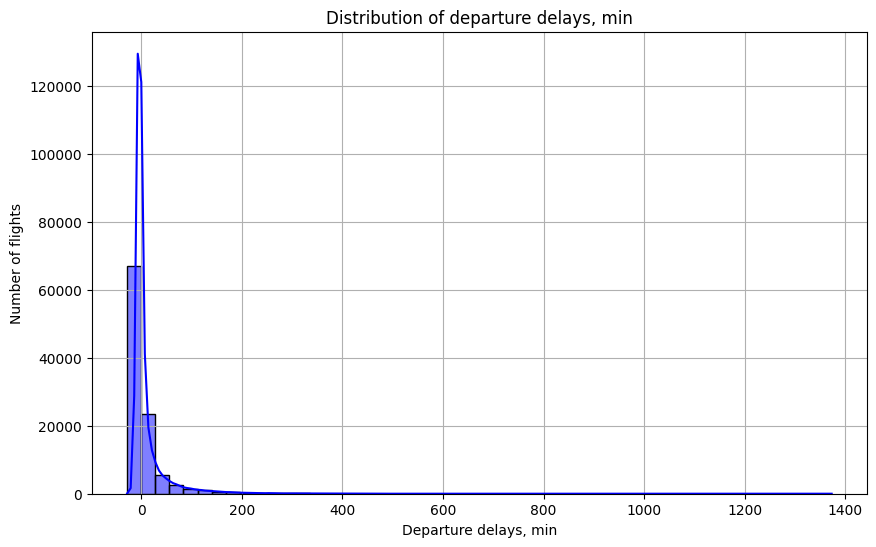

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(flights['dep_delay'], bins=50, kde=True, color='blue')

plt.title('Distribution of departure delays, min')
plt.xlabel('Departure delays, min')
plt.ylabel('Number of flights')

# Transparent background
ax.patch.set_alpha(0.0)  
fig.patch.set_alpha(0.0)  

ax.grid(True)
plt.show()


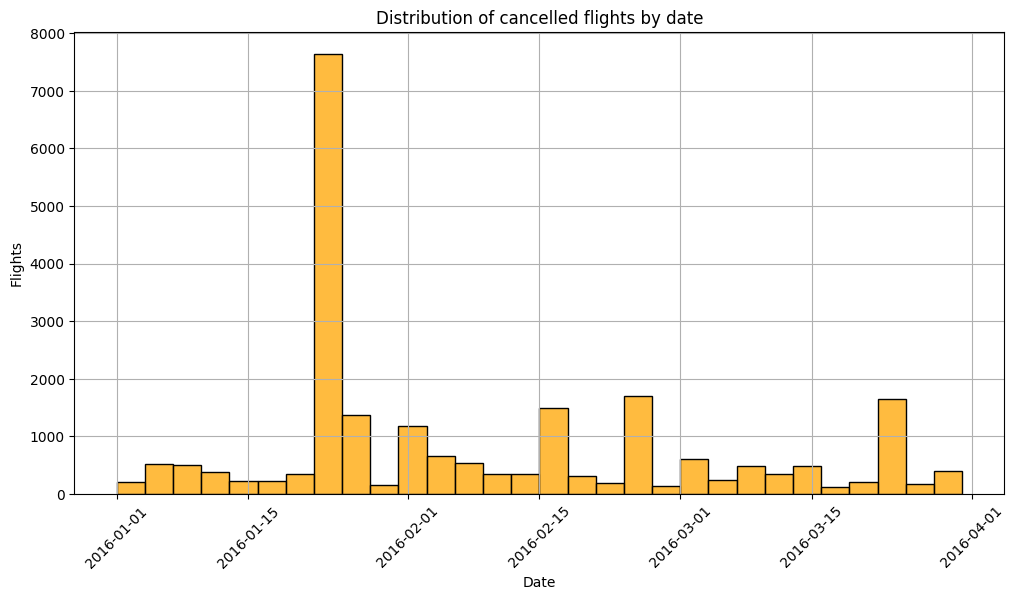

In [31]:
cancelled_flights = flights_all[flights_all['cancelled'] == 1]
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=cancelled_flights, x='flight_date', bins=30, kde=False, color='orange')
plt.title('Distribution of cancelled flights by date')
plt.xlabel('Date')
plt.ylabel('Flights')
plt.xticks(rotation=45)

# Transparent background
ax.patch.set_alpha(0.0)  
fig.patch.set_alpha(0.0) 

plt.grid(True)
plt.show();

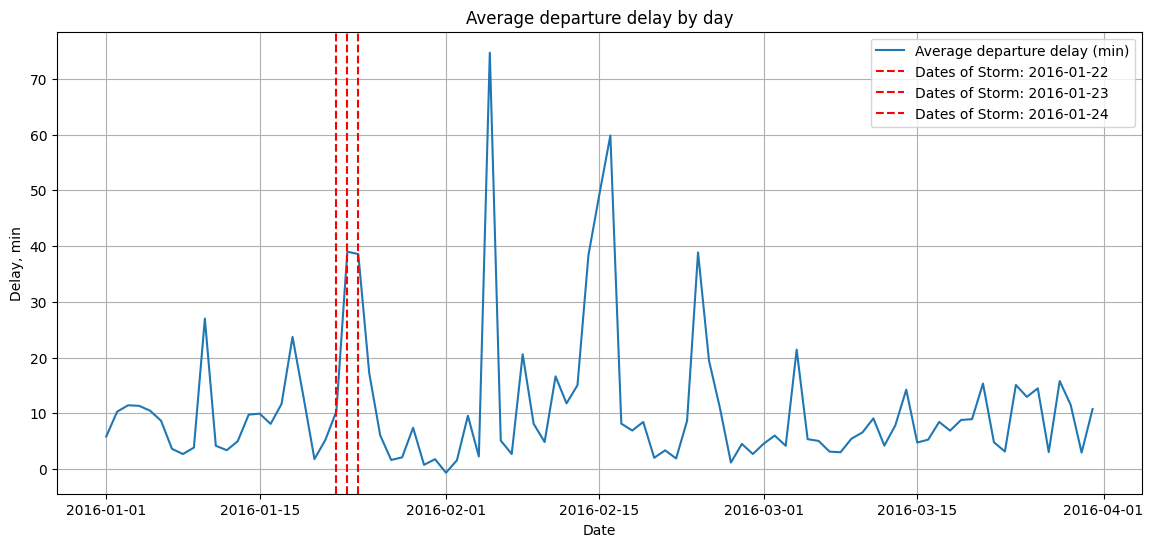

In [32]:
daily_delays = flights.groupby('flight_date')['dep_delay'].mean()

fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(daily_delays, label='Average departure delay (min)')

highlight_dates = ['2016-01-22', '2016-01-23', '2016-01-24']  

for date in highlight_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', label=f"Dates of Storm: {date}")

plt.title('Average departure delay by day')
plt.xlabel('Date')
plt.ylabel('Delay, min')
plt.legend()
# Transparent background
ax.patch.set_alpha(0.0)
fig.patch.set_alpha(0.0) 

plt.grid(True)
plt.show();

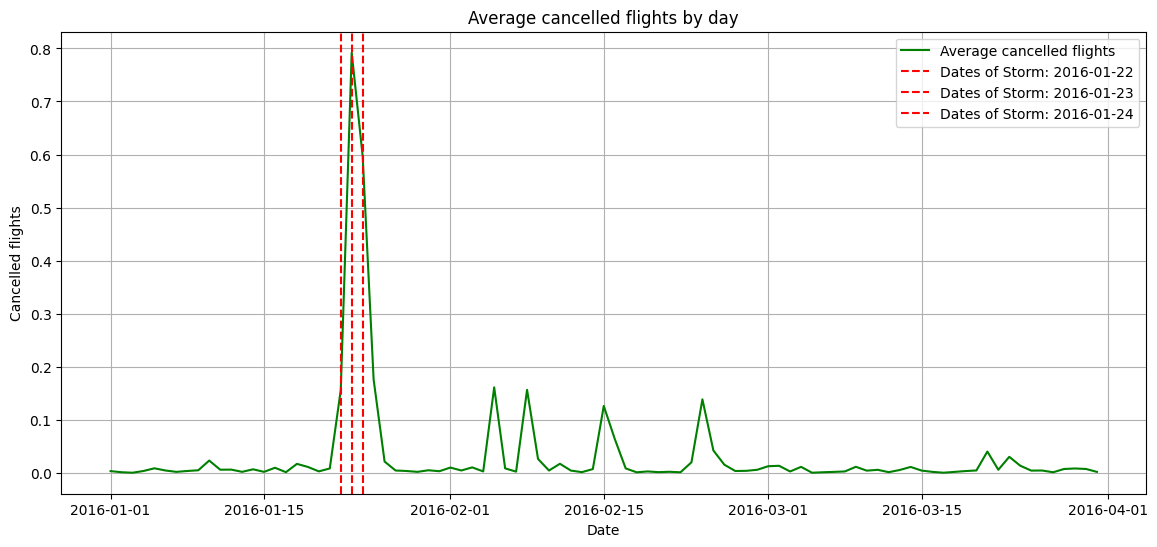

In [33]:

daily_cancelled = flights.groupby('flight_date')['cancelled'].mean()

fig, ax = plt.subplots(figsize=(14, 6))

plt.plot(daily_cancelled, label='Average cancelled flights', color = 'green')

highlight_dates = ['2016-01-22', '2016-01-23', '2016-01-24']  

for date in highlight_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', label=f"Dates of Storm: {date}") # red dots lines


plt.title('Average cancelled flights by day')
plt.xlabel('Date')
plt.ylabel('Cancelled flights')
plt.legend()
# Transparent background
ax.patch.set_alpha(0.0)
fig.patch.set_alpha(0.0) 
plt.grid()
plt.show();

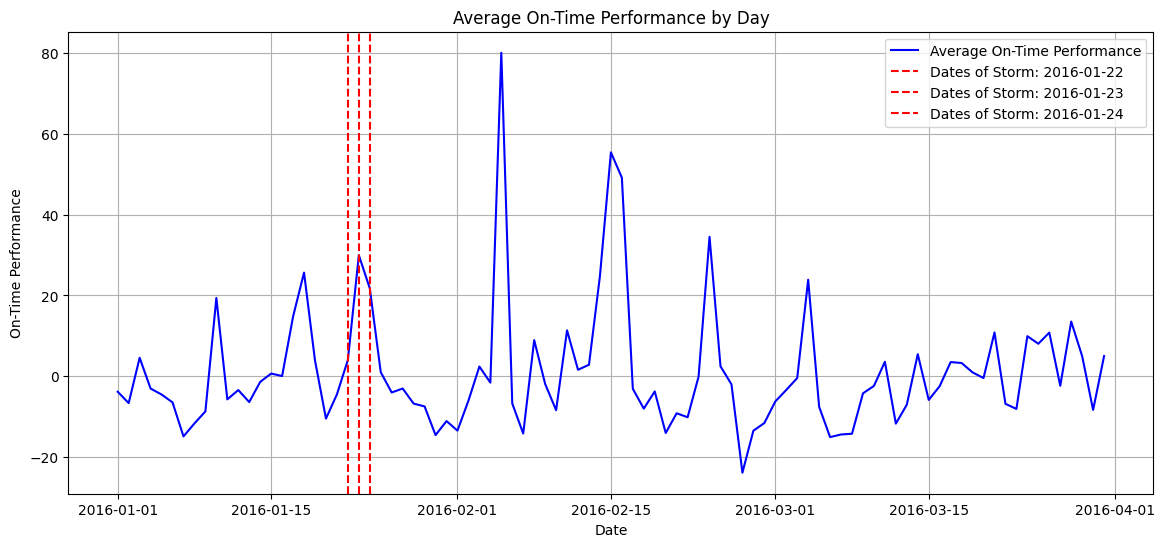

In [34]:

# Calculate the On-Time Performance (OTP) as the complement of the cancellation rate
daily_otp = flights.groupby('flight_date')['arr_delay'].apply(lambda x: x.mean())

# Plotting the On-Time Performance (OTP)
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(daily_otp, label='Average On-Time Performance', color = 'blue')

# Highlighting the same storm dates
highlight_dates = ['2016-01-22', '2016-01-23', '2016-01-24']  

for date in highlight_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', label=f"Dates of Storm: {date}")

# Setting the title and axis labels
plt.title('Average On-Time Performance by Day')
plt.xlabel('Date')
plt.ylabel('On-Time Performance')
plt.legend()

# Transparent background
ax.patch.set_alpha(0.0)
fig.patch.set_alpha(0.0) 

plt.grid()
plt.show()


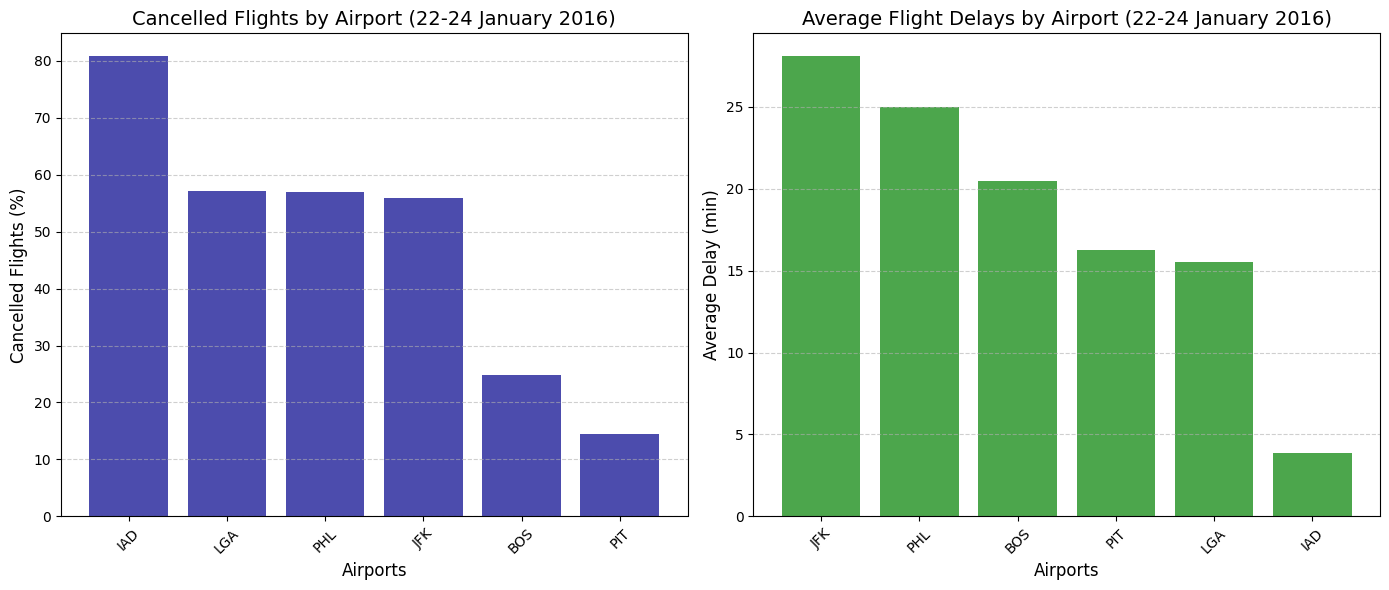

In [36]:
storm_dates = ['2016-01-22', '2016-01-23', '2016-01-24']
filtered_flights = flights[flights['flight_date'].isin(storm_dates)]

# Percentage of cancelled flights
cancelled_by_airport = (
    filtered_flights.groupby('origin')['cancelled']
    .mean()
    .mul(100)  
    .sort_values(ascending=False)
)

# Average delay (in minutes)
delays_by_airport = (
    filtered_flights.groupby('origin')['dep_delay']
    .mean()
    .sort_values(ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
fig.patch.set_alpha(0.0)  

# For cancelled flights
axes[0].bar(cancelled_by_airport.index, cancelled_by_airport.values, color='darkblue', alpha=0.7)
axes[0].set_title('Cancelled Flights by Airport (22-24 January 2016)', fontsize=14)
axes[0].set_xlabel('Airports', fontsize=12)
axes[0].set_ylabel('Cancelled Flights (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# For delays
axes[1].bar(delays_by_airport.index, delays_by_airport.values, color='green', alpha=0.7)
axes[1].set_title('Average Flight Delays by Airport (22-24 January 2016)', fontsize=14)
axes[1].set_xlabel('Airports', fontsize=12)
axes[1].set_ylabel('Average Delay (min)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

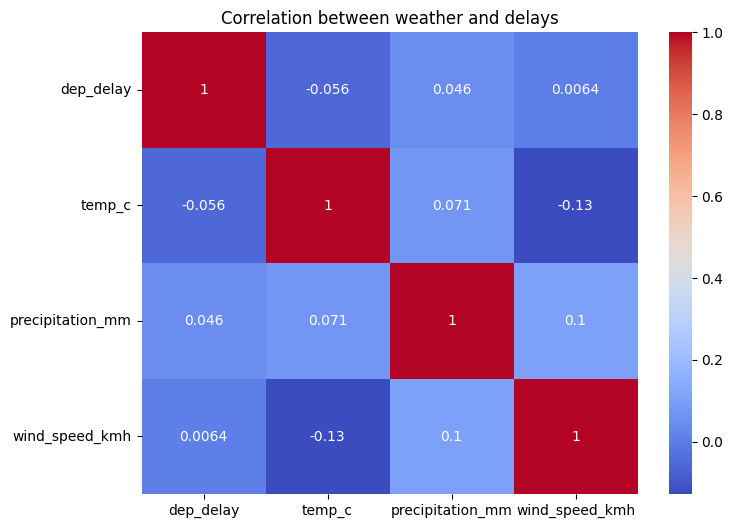

In [37]:
flights_weather = pd.merge(
    flights,
    weather_hourly,
    left_on=['flight_date', 'origin'],
    right_on=['timestamp', 'airport_code'],
    how='inner'
)

correlation_matrix = flights_weather[['dep_delay', 'temp_c', 'precipitation_mm', 'wind_speed_kmh']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between weather and delays')

# Transparent background
fig.patch.set_alpha(0.0)
plt.show()

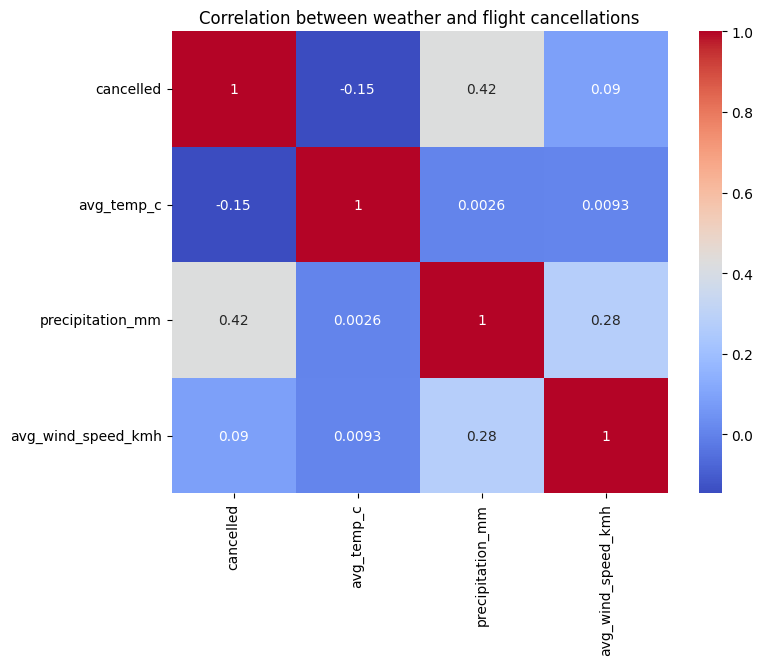

In [38]:

flights['flight_date'] = pd.to_datetime(flights['flight_date'])
weather_daily['date'] = pd.to_datetime(weather_daily['date'])

flights_weather_d = pd.merge(
    flights,
    weather_daily,
    left_on=['flight_date', 'origin'], 
    right_on=['date', 'airport_code'],  
    how='inner' 
)


correlation_matrix = flights_weather_d[['cancelled', 'avg_temp_c', 'precipitation_mm', 'avg_wind_speed_kmh']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between weather and flight cancellations')

# Transparent background
fig.patch.set_alpha(0.0)
plt.show()

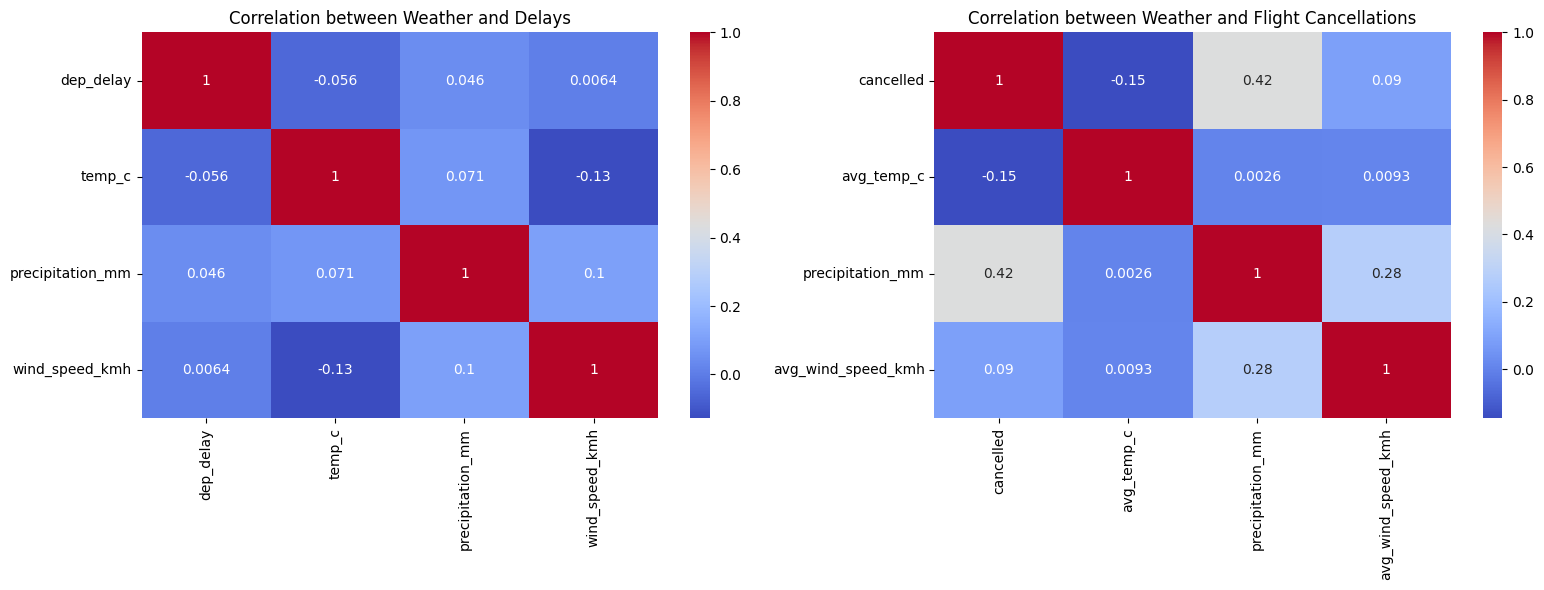

In [39]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Два графика рядом

# 1
sns.heatmap(
    flights_weather[['dep_delay', 'temp_c', 'precipitation_mm', 'wind_speed_kmh']].corr(), 
    annot=True, cmap='coolwarm', ax=axes[0]
)
axes[0].set_title('Correlation between Weather and Delays')

# 2
sns.heatmap(
    flights_weather_d[['cancelled', 'avg_temp_c', 'precipitation_mm', 'avg_wind_speed_kmh']].corr(), 
    annot=True, cmap='coolwarm', ax=axes[1]
)
axes[1].set_title('Correlation between Weather and Flight Cancellations')

# Transparent background
fig.patch.set_alpha(0.0)

plt.tight_layout()
plt.show()


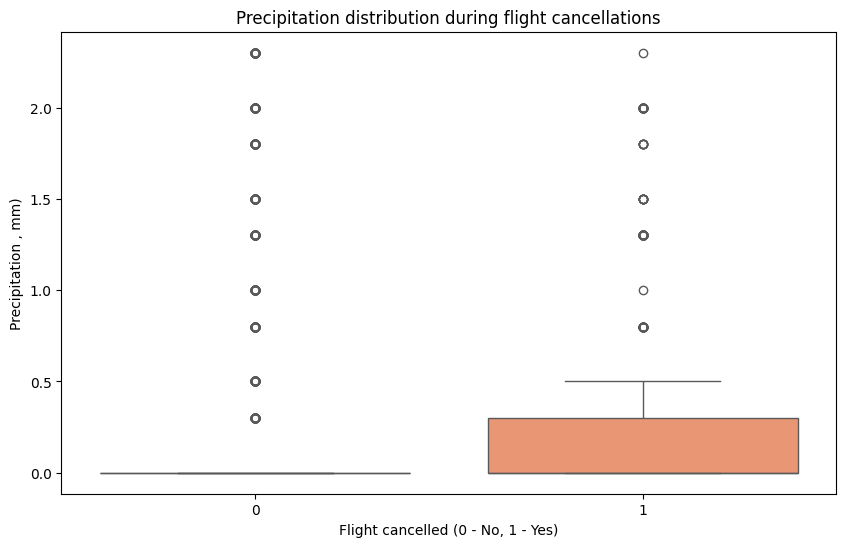

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=flights_weather, x='cancelled', y='precipitation_mm', palette='Set2')
plt.title('Precipitation distribution during flight cancellations')
plt.xlabel('Flight cancelled (0 - No, 1 - Yes)')
plt.ylabel('Precipitation , mm)')

# Transparent background
ax.patch.set_alpha(0.0)
fig.patch.set_alpha(0.0) 

plt.show()


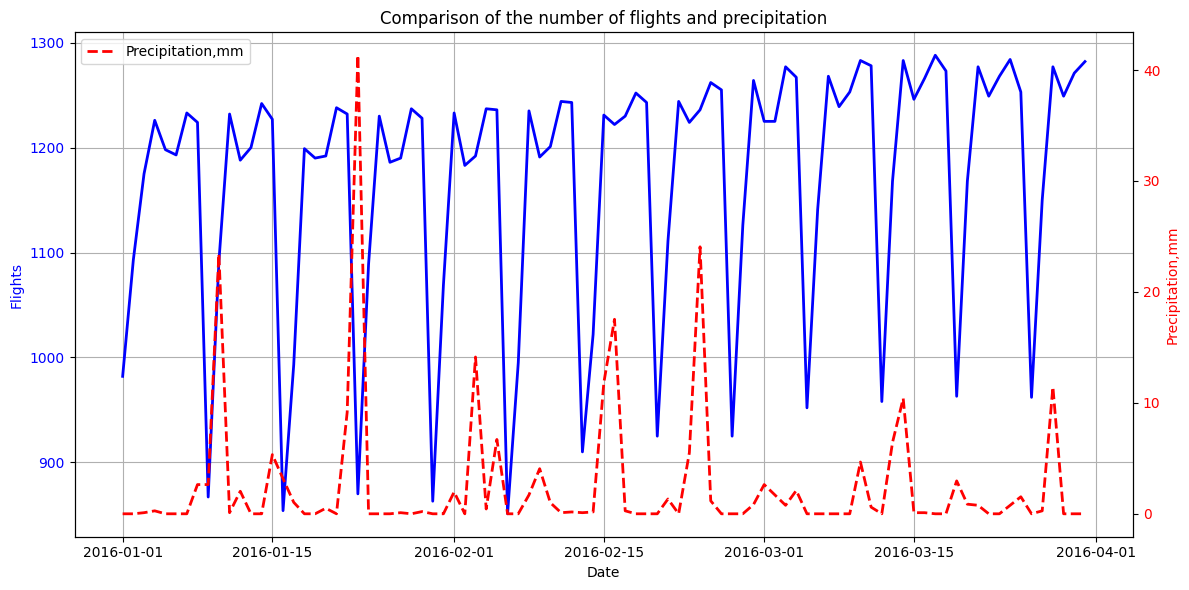

In [41]:

flights['flight_date'] = pd.to_datetime(flights['flight_date'])
weather_daily['date'] = pd.to_datetime(weather_daily['date'])
flights_count = flights.groupby('flight_date')['flight_number'].count()
daily_precipitation = weather_daily.groupby('date')['precipitation_mm'].mean()


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(flights_count, label='Flights', color='blue', linestyle='-', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Flights', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()  
ax2.plot(daily_precipitation, label='Precipitation,mm', color='red', linestyle='--', linewidth=2)
ax2.set_ylabel('Precipitation,mm', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Настройки графика
plt.title('Comparison of the number of flights and precipitation')
ax1.grid(True)
fig.tight_layout() 
plt.legend(loc='upper left')
plt.show()

#### T-testing for delays 

#### H0 - Extreme precipitations have no impact on flights delays H1 - have  impact

In [42]:

# The threshold for extreme precipitation
precipitation_threshold = 15

# Label for extreme precipitation
weather_daily['extreme_precipitation'] = weather_daily['precipitation_mm'] > precipitation_threshold

# Join flights & weather
flights_weather = pd.merge(
    flights,
    weather_daily[['date', 'extreme_precipitation']],
    left_on='flight_date',
    right_on='date',
    how='inner'
)


flights_extreme = flights_weather[flights_weather['extreme_precipitation'] == True]
flights_normal = flights_weather[flights_weather['extreme_precipitation'] == False]

extreme_flights_count = flights_extreme.groupby('flight_date')['flight_number'].count()
normal_flights_count = flights_normal.groupby('flight_date')['flight_number'].count()

extreme_cancellations_count = flights_extreme.groupby('flight_date')['dep_delay'].sum()
normal_cancellations_count = flights_normal.groupby('flight_date')['dep_delay'].sum()

# performing a t-test for the number of cancelled flights
t_stat, p_value = ttest_ind(extreme_cancellations_count.dropna(), normal_cancellations_count.dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Интерпретация результатов
if p_value < 0.05:
    print("There are statistically significant differences in the average delay values between extreme precipitation and normal conditions.")
else:
    print("There are no statistically significant differences in the average delay values.")

T-statistic: 2.5972890398630204
P-value: 0.010858472907860557
There are statistically significant differences in the average delay values between extreme precipitation and normal conditions.


#### T-testing for cancelled flights

#### H0 - Extreme precipitations have no impact on flights cancellations 

In [43]:

flights_extreme['cancelled'] = flights_extreme['cancelled'].astype(int)
flights_normal['cancelled'] = flights_normal['cancelled'].astype(int)

extreme_cancellations_rate = flights_extreme.groupby('flight_date')['cancelled'].mean()
normal_cancellations_rate = flights_normal.groupby('flight_date')['cancelled'].mean()

t_stat, p_value = ttest_ind(extreme_cancellations_rate.dropna(), normal_cancellations_rate.dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There are statistically significant differences in the frequency of cancellations between extreme precipitation and normal conditions.")
else:
    print("There are no statistically significant differences in the frequency of cancelled flights.")


T-statistic: 3.0633399504154117
P-value: 0.002833434591546748
There are statistically significant differences in the frequency of cancellations between extreme precipitation and normal conditions.


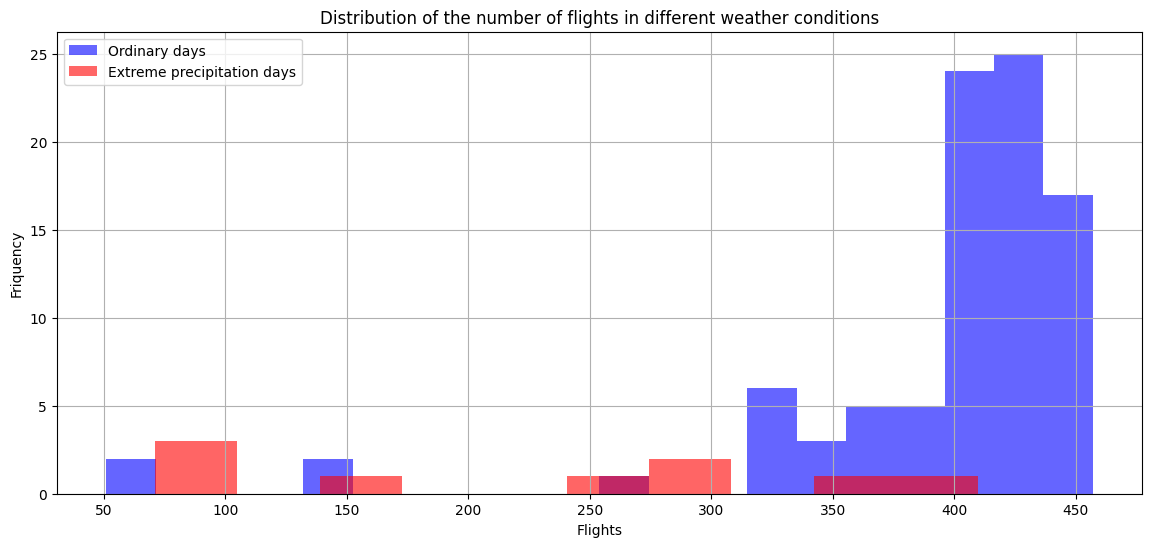

In [44]:
# the threshold for extreme precipitation
threshold = 15

flights_weather = pd.merge(
    flights, weather_daily,  
    left_on=['flight_date', 'origin'], 
    right_on=['date', 'airport_code'],
    how='left' 
)

# number of flights on normal and extreme days
flights_normal = flights_weather[flights_weather['precipitation_mm'] < threshold].groupby('flight_date')['flight_number'].count()
flights_extreme = flights_weather[flights_weather['precipitation_mm'] >= threshold].groupby('flight_date')['flight_number'].count()

fig, ax = plt.subplots(figsize=(14, 6))
plt.hist(flights_normal, bins=20, alpha=0.6, label='Ordinary days', color='blue')
plt.hist(flights_extreme, bins=10, alpha=0.6, label='Extreme precipitation days', color='red')
plt.xlabel('Flights')
plt.ylabel('Friquency')
plt.title('Distribution of the number of flights in different weather conditions')
plt.legend()
plt.grid()
# Transparent background
ax.patch.set_alpha(0.0)
fig.patch.set_alpha(0.0)
plt.show()

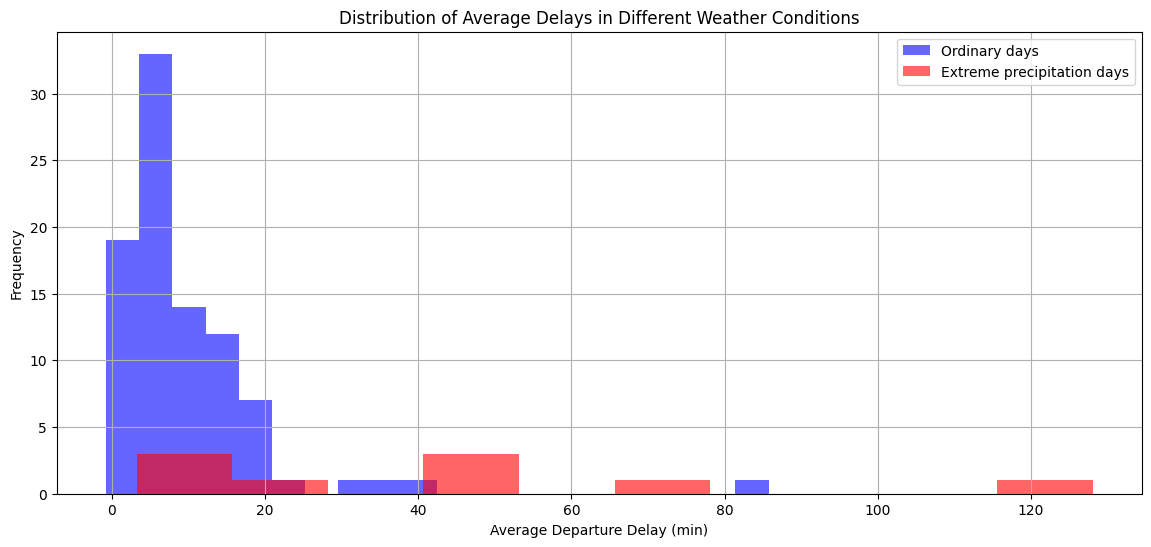

In [45]:
threshold = 15

flights_weather = pd.merge(
    flights, weather_daily,  
    left_on=['flight_date', 'origin'], 
    right_on=['date', 'airport_code'],
    how='left' 
)

# number of flights on normal and extreme days
flights_normal = flights_weather[flights_weather['precipitation_mm'] < threshold].groupby('flight_date')['flight_number'].count()
flights_extreme = flights_weather[flights_weather['precipitation_mm'] >= threshold].groupby('flight_date')['flight_number'].count()

# Группируем и вычисляем средние задержки по дням
delays_normal = flights_weather[flights_weather['precipitation_mm'] < threshold].groupby('flight_date')['dep_delay'].mean()
delays_extreme = flights_weather[flights_weather['precipitation_mm'] >= threshold].groupby('flight_date')['dep_delay'].mean()

fig, ax = plt.subplots(figsize=(14, 6))
plt.hist(delays_normal.dropna(), bins=20, alpha=0.6, label='Ordinary days', color='blue')
plt.hist(delays_extreme.dropna(), bins=10, alpha=0.6, label='Extreme precipitation days', color='red')

plt.xlabel('Average Departure Delay (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Delays in Different Weather Conditions')
plt.legend()
plt.grid()

# Transparent background
ax.patch.set_alpha(0.0)
fig.patch.set_alpha(0.0)
plt.show()


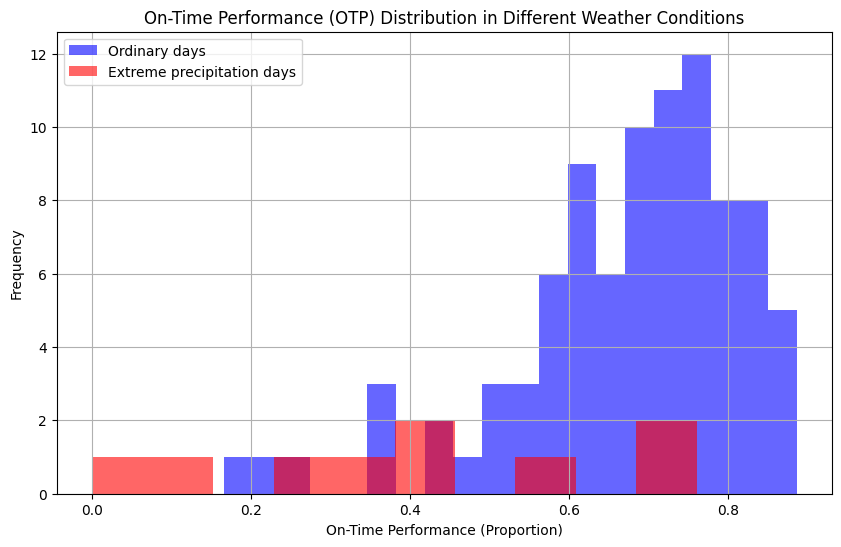

In [46]:
# We define flights without delays as OTP
flights_weather['on_time'] = flights_weather['arr_delay'] <= 0

# Calculating OTP for normal days and days with extreme precipitation
otp_normal = flights_weather[flights_weather['precipitation_mm'] < threshold].groupby('flight_date')['on_time'].mean()
otp_extreme = flights_weather[flights_weather['precipitation_mm'] >= threshold].groupby('flight_date')['on_time'].mean()

plt.figure(figsize=(10, 6))

plt.hist(otp_normal.dropna(), bins=20, alpha=0.6, label='Ordinary days', color='blue')
plt.hist(otp_extreme.dropna(), bins=10, alpha=0.6, label='Extreme precipitation days', color='red')

plt.xlabel('On-Time Performance (Proportion)')
plt.ylabel('Frequency')
plt.title('On-Time Performance (OTP) Distribution in Different Weather Conditions')
plt.legend()
plt.grid()

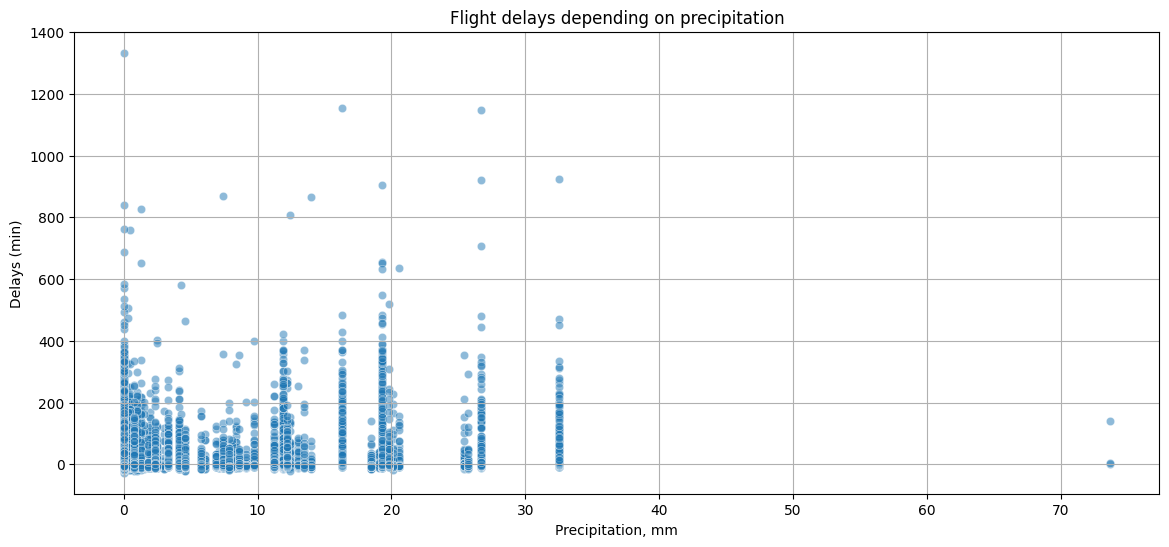

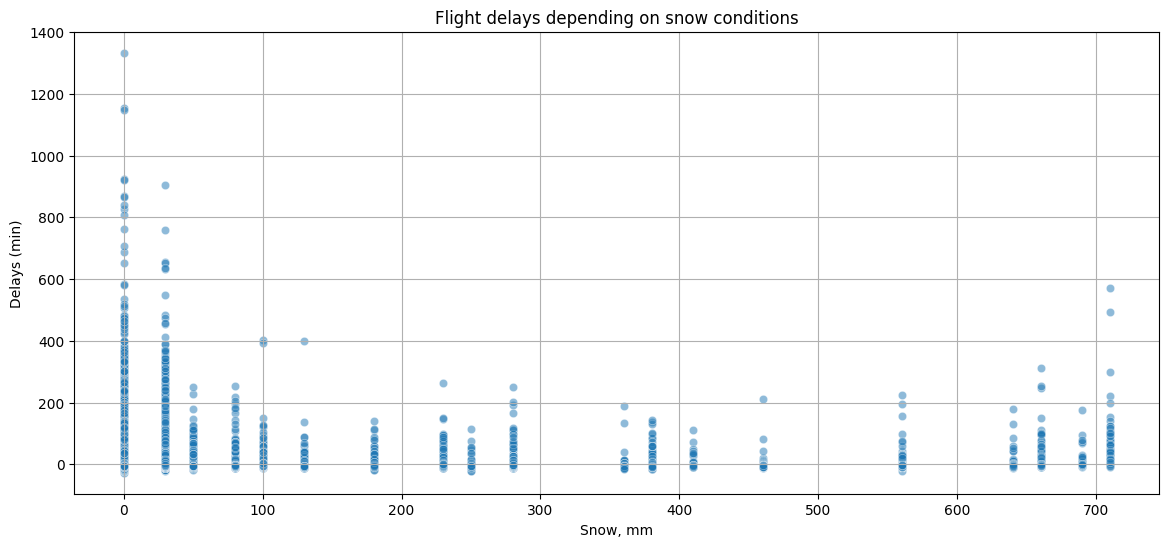

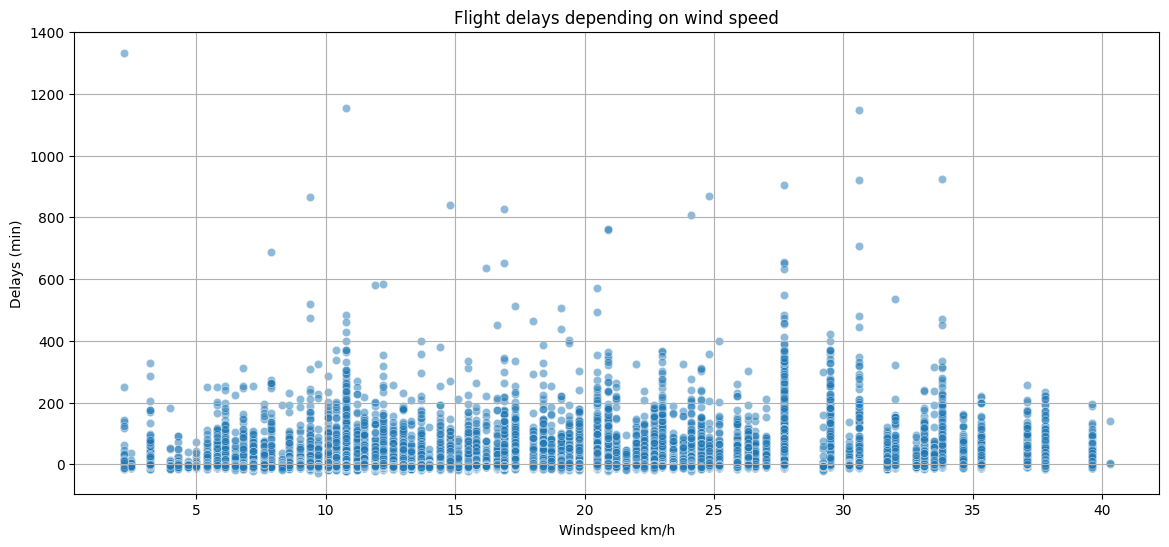

In [47]:
# Delays depending on precipitation
plt.figure(figsize=(14, 6))
sns.scatterplot(data=flights_weather, x='precipitation_mm', y='dep_delay', alpha=0.5)
plt.title('Flight delays depending on precipitation')
plt.xlabel('Precipitation, mm')
plt.ylabel('Delays (min)')
plt.grid(True)
plt.show()

# Delays depending on snow
plt.figure(figsize=(14, 6))
sns.scatterplot(data=flights_weather, x='max_snow_mm', y='dep_delay', alpha=0.5)
plt.title('Flight delays depending on snow conditions')
plt.xlabel('Snow, mm')
plt.ylabel('Delays (min)')
plt.grid(True)
plt.show()

# Graph of the dependence of delays on wind speed
plt.figure(figsize=(14, 6))
sns.scatterplot(data=flights_weather, x='avg_wind_speed_kmh', y='dep_delay', alpha=0.5)
plt.title('Flight delays depending on wind speed')
plt.xlabel('Windspeed km/h')
plt.ylabel('Delays (min)')
plt.grid(True)
plt.show()